In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

36it [00:00, 12.62it/s]

62it [00:00, 17.58it/s]

95it [00:00, 24.54it/s]

128it [00:00, 33.95it/s]

160it [00:00, 46.35it/s]

192it [00:00, 62.25it/s]

222it [00:00, 81.60it/s]

254it [00:00, 105.01it/s]

286it [00:01, 131.52it/s]

318it [00:01, 159.71it/s]

350it [00:01, 186.95it/s]

382it [00:01, 212.89it/s]

415it [00:01, 237.56it/s]

447it [00:01, 256.72it/s]

479it [00:01, 251.63it/s]

509it [00:01, 256.03it/s]

539it [00:01, 266.63it/s]

568it [00:02, 267.70it/s]

597it [00:02, 236.14it/s]

623it [00:02, 227.07it/s]

655it [00:02, 247.82it/s]

689it [00:02, 269.21it/s]

723it [00:02, 286.37it/s]

757it [00:02, 300.12it/s]

793it [00:02, 314.49it/s]

829it [00:02, 325.37it/s]

865it [00:03, 333.21it/s]

901it [00:03, 338.95it/s]

936it [00:03, 336.43it/s]

970it [00:03, 332.43it/s]

1006it [00:03, 338.81it/s]

1042it [00:03, 342.57it/s]

1078it [00:03, 346.02it/s]

1113it [00:03, 346.76it/s]

1148it [00:03, 347.38it/s]

1183it [00:03, 347.32it/s]

1218it [00:04, 343.82it/s]

1254it [00:04, 346.13it/s]

1289it [00:04, 347.25it/s]

1325it [00:04, 348.17it/s]

1360it [00:04, 336.46it/s]

1395it [00:04, 339.91it/s]

1430it [00:04, 342.04it/s]

1465it [00:04, 343.96it/s]

1500it [00:04, 343.70it/s]

1535it [00:04, 345.02it/s]

1570it [00:05, 346.21it/s]

1605it [00:05, 323.21it/s]

1640it [00:05, 330.23it/s]

1676it [00:05, 335.93it/s]

1711it [00:05, 339.27it/s]

1746it [00:05, 341.48it/s]

1782it [00:05, 344.11it/s]

1818it [00:05, 346.99it/s]

1853it [00:05, 343.51it/s]

1889it [00:05, 347.87it/s]

1924it [00:06, 346.41it/s]

1960it [00:06, 348.21it/s]

1995it [00:06, 343.26it/s]

2030it [00:06, 340.98it/s]

2066it [00:06, 343.91it/s]

2101it [00:06, 345.43it/s]

2136it [00:06, 345.36it/s]

2171it [00:06, 344.92it/s]

2206it [00:06, 345.78it/s]

2241it [00:07, 342.31it/s]

2276it [00:07, 343.10it/s]

2312it [00:07, 346.49it/s]

2348it [00:07, 347.73it/s]

2385it [00:07, 351.61it/s]

2421it [00:07, 353.93it/s]

2457it [00:07, 355.39it/s]

2493it [00:07, 356.67it/s]

2529it [00:07, 354.66it/s]

2565it [00:07, 351.38it/s]

2601it [00:08, 351.70it/s]

2638it [00:08, 354.95it/s]

2674it [00:08, 355.38it/s]

2711it [00:08, 356.81it/s]

2747it [00:08, 355.48it/s]

2783it [00:08, 355.03it/s]

2820it [00:08, 357.49it/s]

2856it [00:08, 356.96it/s]

2892it [00:08, 355.67it/s]

2929it [00:08, 357.81it/s]

2965it [00:09, 355.46it/s]

3002it [00:09, 356.68it/s]

3039it [00:09, 357.86it/s]

3075it [00:09, 358.28it/s]

3111it [00:09, 341.05it/s]

3147it [00:09, 345.58it/s]

3184it [00:09, 349.80it/s]

3221it [00:09, 353.07it/s]

3257it [00:09, 353.51it/s]

3293it [00:09, 354.40it/s]

3329it [00:10, 355.05it/s]

3365it [00:10, 356.19it/s]

3401it [00:10, 356.56it/s]

3437it [00:10, 357.57it/s]

3474it [00:10, 358.49it/s]

3510it [00:10, 358.92it/s]

3546it [00:10, 358.75it/s]

3582it [00:10, 356.39it/s]

3618it [00:10, 357.10it/s]

3655it [00:10, 358.95it/s]

3691it [00:11, 359.25it/s]

3727it [00:11, 339.01it/s]

3763it [00:11, 343.09it/s]

3799it [00:11, 346.39it/s]

3835it [00:11, 347.91it/s]

3871it [00:11, 350.54it/s]

3907it [00:11, 346.43it/s]

3942it [00:11, 333.38it/s]

3978it [00:11, 340.18it/s]

4015it [00:12, 346.73it/s]

4051it [00:12, 348.55it/s]

4088it [00:12, 352.76it/s]

4124it [00:12, 354.34it/s]

4160it [00:12, 355.68it/s]

4197it [00:12, 357.69it/s]

4234it [00:12, 359.26it/s]

4271it [00:12, 360.44it/s]

4308it [00:12, 359.53it/s]

4322it [00:12, 335.00it/s]


0it [00:00, ?it/s]

37it [00:00, 361.05it/s]

75it [00:00, 364.52it/s]

113it [00:00, 368.11it/s]

151it [00:00, 370.86it/s]

187it [00:00, 365.27it/s]

222it [00:00, 358.21it/s]

258it [00:00, 357.47it/s]

296it [00:00, 361.36it/s]

334it [00:00, 366.29it/s]

373it [00:01, 370.39it/s]

411it [00:01, 371.95it/s]

449it [00:01, 374.13it/s]

488it [00:01, 376.23it/s]

526it [00:01, 376.33it/s]

564it [00:01, 376.05it/s]

602it [00:01, 353.53it/s]

640it [00:01, 360.03it/s]

677it [00:01, 357.46it/s]

716it [00:01, 364.11it/s]

755it [00:02, 369.36it/s]

794it [00:02, 373.26it/s]

832it [00:02, 372.63it/s]

870it [00:02, 365.72it/s]

909it [00:02, 372.07it/s]

947it [00:02, 374.29it/s]

986it [00:02, 375.97it/s]

1024it [00:02, 376.11it/s]

1063it [00:02, 379.11it/s]

1101it [00:02, 379.21it/s]

1140it [00:03, 380.19it/s]

1179it [00:03, 377.41it/s]

1217it [00:03, 375.78it/s]

1255it [00:03, 355.84it/s]

1294it [00:03, 364.08it/s]

1333it [00:03, 371.04it/s]

1373it [00:03, 377.08it/s]

1413it [00:03, 381.37it/s]

1452it [00:03, 382.98it/s]

1491it [00:04, 384.06it/s]

1530it [00:04, 384.59it/s]

1569it [00:04, 385.49it/s]

1608it [00:04, 332.34it/s]

1647it [00:04, 346.69it/s]

1686it [00:04, 358.22it/s]

1726it [00:04, 368.15it/s]

1766it [00:04, 375.43it/s]

1805it [00:04, 379.27it/s]

1844it [00:04, 378.81it/s]

1884it [00:05, 382.43it/s]

1923it [00:05, 376.24it/s]

1962it [00:05, 378.11it/s]

2001it [00:05, 380.73it/s]

2040it [00:05, 381.79it/s]

2079it [00:05, 381.93it/s]

2118it [00:05, 382.82it/s]

2157it [00:05, 383.89it/s]

2196it [00:05, 385.57it/s]

2236it [00:05, 387.24it/s]

2275it [00:06, 386.49it/s]

2314it [00:06, 387.05it/s]

2354it [00:06, 387.98it/s]

2393it [00:06, 387.26it/s]

2432it [00:06, 386.43it/s]

2471it [00:06, 379.52it/s]

2511it [00:06, 383.92it/s]

2551it [00:06, 387.02it/s]

2590it [00:06, 386.29it/s]

2630it [00:07, 390.23it/s]

2670it [00:07, 392.60it/s]

2710it [00:07, 392.38it/s]

2750it [00:07, 389.91it/s]

2790it [00:07, 389.22it/s]

2830it [00:07, 389.84it/s]

2869it [00:07, 388.24it/s]

2908it [00:07, 385.15it/s]

2948it [00:07, 387.29it/s]

2987it [00:07, 385.80it/s]

3026it [00:08, 384.72it/s]

3065it [00:08, 383.81it/s]

3104it [00:08, 384.03it/s]

3144it [00:08, 386.09it/s]

3183it [00:08, 385.71it/s]

3222it [00:08, 386.33it/s]

3261it [00:08, 386.66it/s]

3300it [00:08, 387.09it/s]

3339it [00:08, 387.73it/s]

3378it [00:08, 387.60it/s]

3417it [00:09, 387.95it/s]

3457it [00:09, 389.39it/s]

3496it [00:09, 386.82it/s]

3535it [00:09, 385.74it/s]

3574it [00:09, 385.05it/s]

3613it [00:09, 378.47it/s]

3652it [00:09, 378.85it/s]

3690it [00:09, 377.73it/s]

3729it [00:09, 378.60it/s]

3767it [00:09, 378.62it/s]

3805it [00:10, 378.46it/s]

3843it [00:10, 378.79it/s]

3881it [00:10, 376.39it/s]

3920it [00:10, 379.33it/s]

3960it [00:10, 382.43it/s]

4000it [00:10, 384.69it/s]

4039it [00:10, 386.18it/s]

4079it [00:10, 387.41it/s]

4119it [00:10, 388.24it/s]

4158it [00:10, 388.38it/s]

4197it [00:11, 387.22it/s]

4236it [00:11, 387.60it/s]

4275it [00:11, 387.65it/s]

4315it [00:11, 389.09it/s]

4322it [00:11, 378.86it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

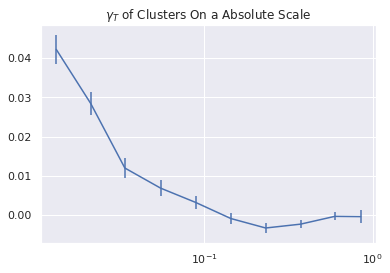

[-32.1239 -46.245  -30.6931 -29.0433 -22.3988  11.276   58.1447  55.0821
  10.3203   3.9458]
------------------------------------------------------------------------------
[ -3287.6667  -6268.1752  -8708.9286 -12386.3573 -17193.4931 -22256.1733
 -25036.3085 -22506.3759 -12733.4833  -1328.8399]
------------------------------------------------------------------------------
[  760.  1626.  2570.  4271.  7098. 11479. 17109. 22800. 24575.  8065.]
------------------------------------------------------------------------------
[-0.0423 -0.0284 -0.0119 -0.0068 -0.0032  0.001   0.0034  0.0024  0.0004
  0.0005]
------------------------------------------------------------------------------
[-4.3259 -3.855  -3.3887 -2.9001 -2.4223 -1.9389 -1.4633 -0.9871 -0.5181
 -0.1648]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

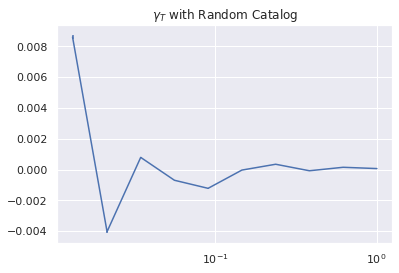

[ 8.6185e-03 -4.0265e-03  7.9752e-04 -6.8759e-04 -1.2114e-03 -2.6256e-05
  3.5231e-04 -7.0388e-05  1.5522e-04  7.1610e-05]
[-1.3110e-04  6.1247e-05 -1.2131e-05  1.0459e-05  1.8427e-05  3.9938e-07
 -5.3590e-06  1.0707e-06 -2.3610e-06 -1.0893e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

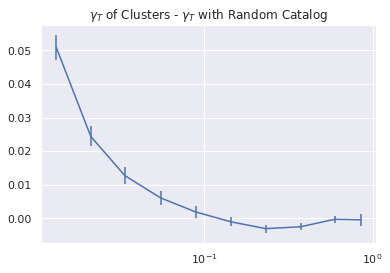

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

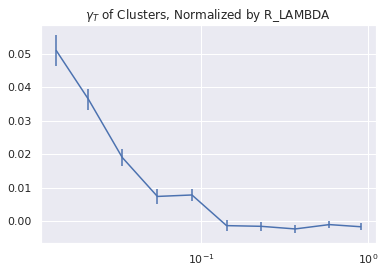

[-21.1748 -41.1351 -40.3647 -24.2398 -42.9504  12.2196  21.9259  46.8204
  25.701   33.6293]
------------------------------------------------------------------------------
[ -1790.0219  -4367.6069  -7197.0957  -9565.5636 -13371.3403 -17683.8496
 -20854.3732 -20137.6882 -13175.2253  -1991.7284]
------------------------------------------------------------------------------
[  416.  1132.  2121.  3291.  5504.  9062. 14130. 20059. 24752. 20002.]
------------------------------------------------------------------------------
[-0.0509 -0.0363 -0.019  -0.0074 -0.0078  0.0013  0.0016  0.0023  0.001
  0.0017]
------------------------------------------------------------------------------
[-4.3029 -3.8583 -3.3933 -2.9066 -2.4294 -1.9514 -1.4759 -1.0039 -0.5323
 -0.0996]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)